In [1]:
import sys
import uproot
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
from processing import counts, kinematics 
from plotting import histos

%load_ext autoreload
%autoreload 2

## Load Events

In [2]:
off_path = "../mg5_data/SM-process_spin-OFF/Events/run_01_decayed_1/tag_1_delphes_events.root"
on_path = "../mg5_data/SM-process_spin-ON/Events/run_01_decayed_1/tag_1_delphes_events.root"

off_events = uproot.open(off_path)["Delphes"]
on_events = uproot.open(on_path)["Delphes"]

## Jets

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 8 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


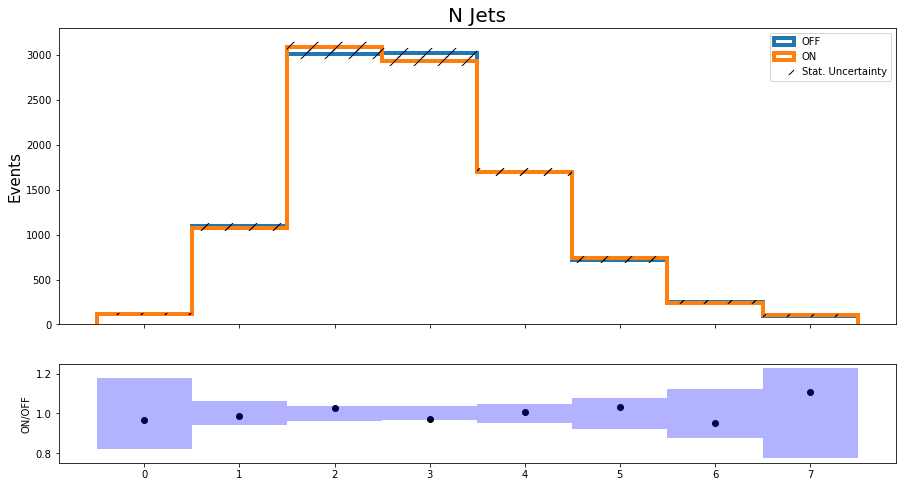

In [3]:
off_njets = counts.n_particles(off_events, "Jet.BTag")
on_njets = counts.n_particles(on_events, "Jet.BTag")
histos.ratio_hist(
    processes_q=[off_njets, on_njets],
    hist_labels=["OFF", "ON"],
    reference_label="OFF",
    n_bins=8,
    hist_range=(0, 8),
    title="N Jets"
)

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 4 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


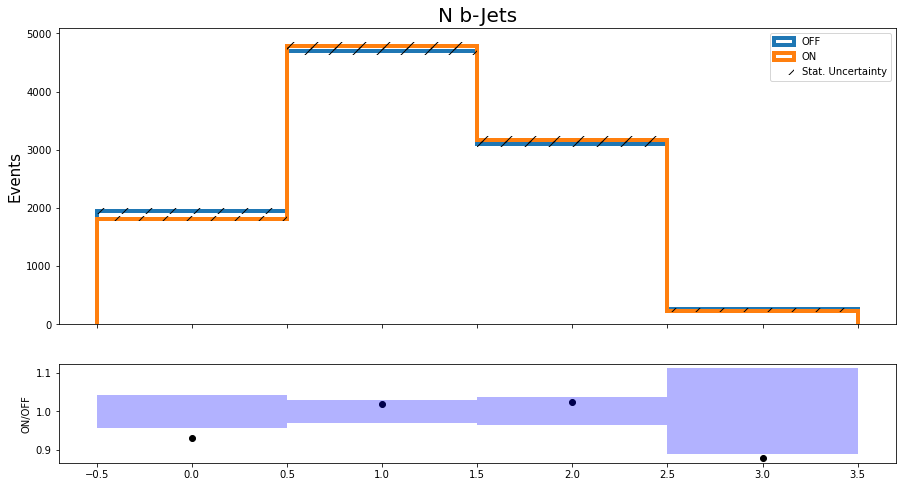

In [4]:
off_nbjets = counts.n_particles_from_tag(off_events, "Jet.BTag")
on_nbjets = counts.n_particles_from_tag(on_events, "Jet.BTag")
histos.ratio_hist(
    processes_q=[off_nbjets, on_nbjets],
    hist_labels=["OFF", "ON"],
    reference_label="OFF",
    n_bins=4,
    hist_range=(0, 4),
    title="N b-Jets"
)

## Leptons

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 3 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


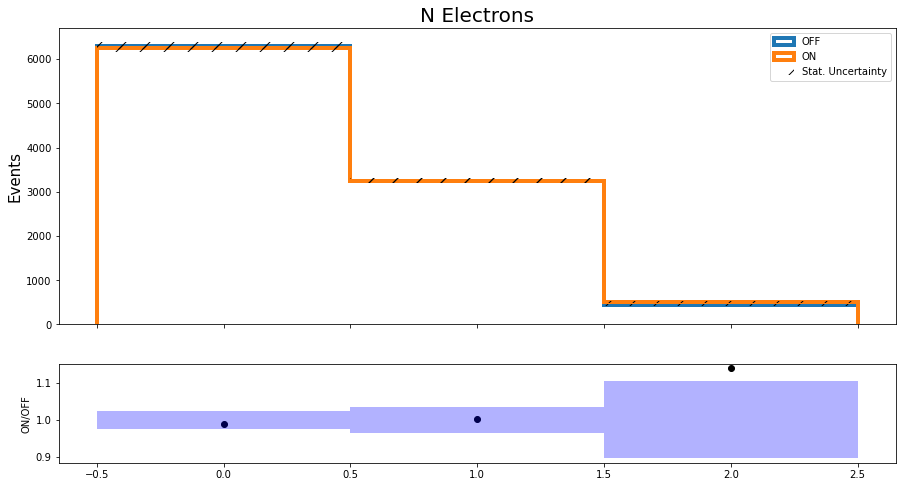

In [5]:
off_nelec = counts.n_particles(off_events, "Electron.PT")
on_nelec = counts.n_particles(on_events, "Electron.PT")
histos.ratio_hist(
    processes_q=[off_nelec, on_nelec],
    hist_labels=["OFF", "ON"],
    reference_label="OFF",
    n_bins=3,
    hist_range=(0, 3),
    title="N Electrons"
)

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 3 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


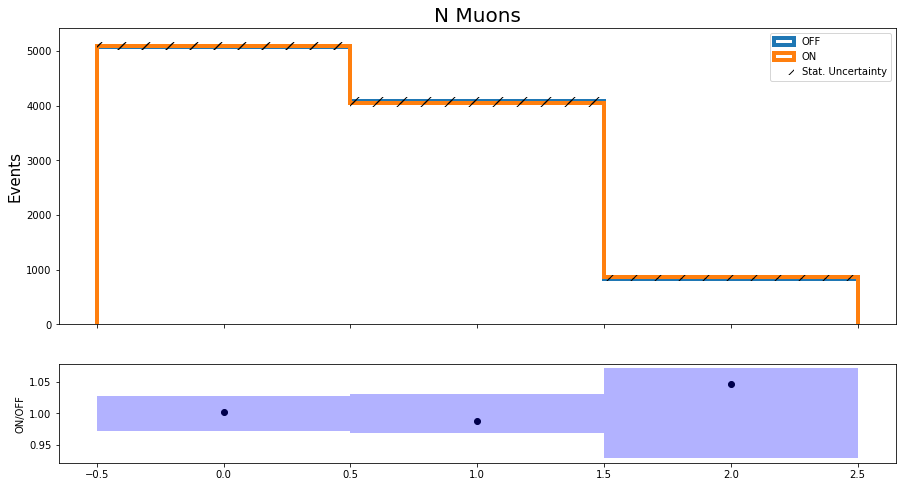

In [6]:
off_nmuon = counts.n_particles(off_events, "Muon.PT")
on_nmuon = counts.n_particles(on_events, "Muon.PT")
histos.ratio_hist(
    processes_q=[off_nmuon, on_nmuon],
    hist_labels=["OFF", "ON"],
    reference_label="OFF",
    n_bins=3,
    hist_range=(0, 3),
    title="N Muons"
)

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 3 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


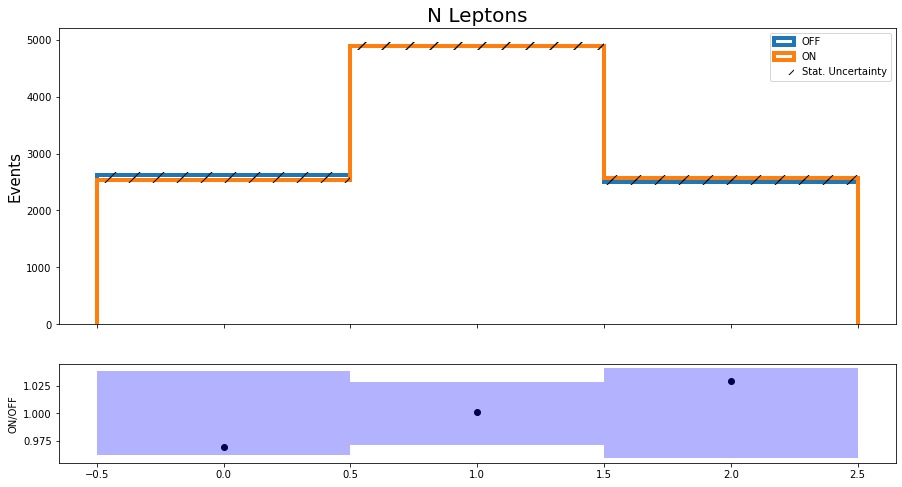

In [7]:
off_nlep = np.array(off_nelec) + np.array(off_nmuon) 
on_nlep = np.array(on_nelec) + np.array(on_nmuon)
histos.ratio_hist(
    processes_q=[off_nlep, on_nlep],
    hist_labels=["OFF", "ON"],
    reference_label="OFF",
    n_bins=3,
    hist_range=(0, 3),
    title="N Leptons"
)

## Di-Lepton System

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 10 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


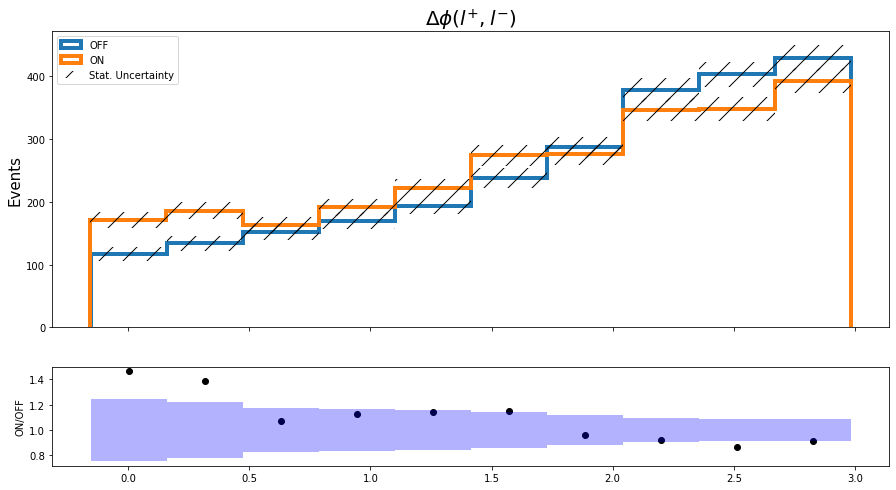

In [8]:
off_dphi = kinematics.dphi_dilepton(off_events)
on_dphi = kinematics.dphi_dilepton(on_events)
histos.ratio_hist(
    processes_q=[off_dphi, on_dphi],
    hist_labels=["OFF", "ON"],
    reference_label="OFF",
    n_bins=10,
    hist_range=None,
    title=r"$\Delta \phi(l^{+}, l^{-})$",
)

## $t\bar{t}$  System

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)
../plotting/histos.py:145: RuntimeWarning: invalid value encountered in true_divide
  ref_frac_error = p_errors[reference_label]/ref_bins
../plotting/histos.py:149: RuntimeWarning: divide by zero encountered in true_divide
  ratios = p_bins[label]/ref_bins


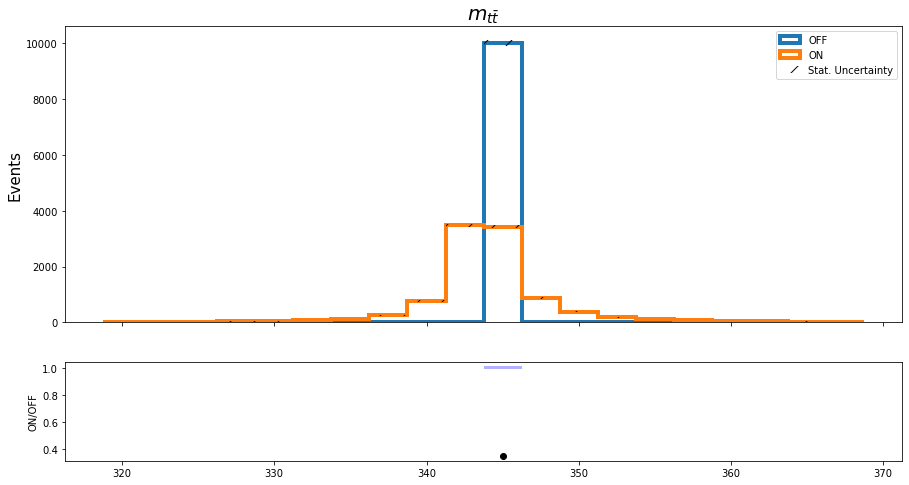

In [9]:
mass_off_count = kinematics.invariant_mass_ttbar(off_events)
mass_on_count = kinematics.invariant_mass_ttbar(on_events)
histos.ratio_hist(
    processes_q=[mass_off_count, mass_on_count],
    hist_labels=["OFF", "ON"],
    reference_label="OFF",
    n_bins=20,
    hist_range=(320, 370),
    title=r"$m_{t\bar{t}}$",
)

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


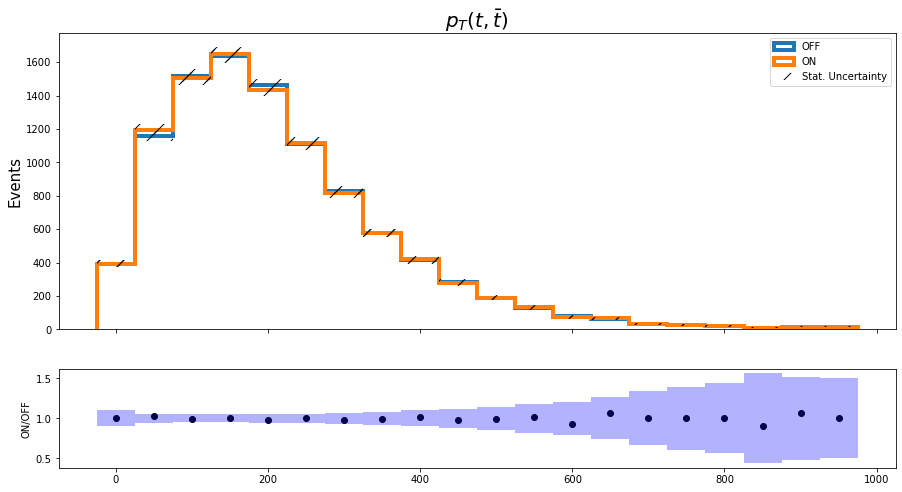

In [10]:
pt_off_count = kinematics.pt_ttbar(off_events)
pt_on_count = kinematics.pt_ttbar(on_events)
histos.ratio_hist(
    processes_q=[pt_off_count, pt_on_count],
    hist_labels=["OFF", "ON"],
    reference_label="OFF",
    n_bins=20,
    hist_range=(0, 1000),
    title=r"$p_T(t, \bar{t})$",
)